<a href="https://colab.research.google.com/github/Kaizensk/Email-marketing-effectiveness-prediction/blob/main/ShwetaKumari_Capstone2_EmailEffectivenessPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [446]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [447]:
import numpy as np 
import pandas as pd

In [448]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [449]:
# Read the csv data
path = "/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 4/capstone2/data_email_campaign.csv"
df = pd.read_csv(path)
df1 = pd.DataFrame(df)

In [450]:
df1

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0


In [451]:
df1.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [452]:
df1.tail()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0
68352,EMA00089999316900,1,1.5,1,G,2,20.0,2,1038,6.0,0.0,0


In [453]:
df1.describe(include='all')

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353,68353.000000,68353.000000,68353.000000,56758,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
unique,68353,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,EMA00084268644560,NaN,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,23173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.285094,1.095481,1.456513,NaN,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,NaN,0.451462,0.997578,0.498109,NaN,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,NaN,1.000000,0.000000,1.000000,NaN,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,NaN,1.000000,0.200000,1.000000,NaN,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,NaN,1.000000,0.800000,1.000000,NaN,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,NaN,2.000000,1.800000,2.000000,NaN,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000


In [454]:
df1.shape

(68353, 12)

In [455]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [456]:
df1.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

In [457]:
df1.shape

(68353, 12)

In [458]:
import numpy as np

ignored = len(df1[df1['Email_Status']==0])
read  = len(df1[df1['Email_Status']==1])
acknowledge = len(df1[df1['Email_Status']==2])

print("IGNORED:",ignored)
print("READ:",read)
print("Acknowledge:",acknowledge)

IGNORED: 54941
READ: 11039
Acknowledge: 2373


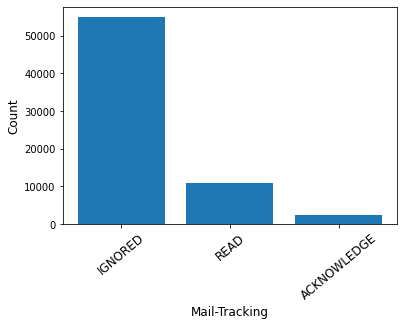

In [459]:
labels = ['IGNORED','READ','ACKNOWLEDGE']
li = [ignored,read,acknowledge]

index = np.arange(len(labels))

plt.bar(index,li)
plt.xlabel('Mail-Tracking',fontsize =12)
plt.ylabel('Count',fontsize =12)
plt.xticks(index,labels,fontsize=12,rotation=40)
plt.show()

In [460]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


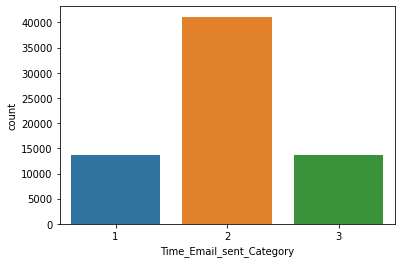

In [461]:
sns.countplot(df1['Time_Email_sent_Category'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


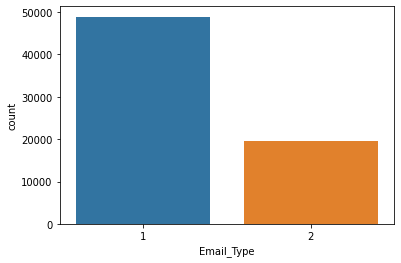

In [462]:
sns.countplot(df1['Email_Type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


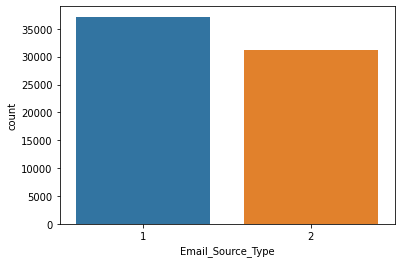

In [463]:
sns.countplot(df1['Email_Source_Type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


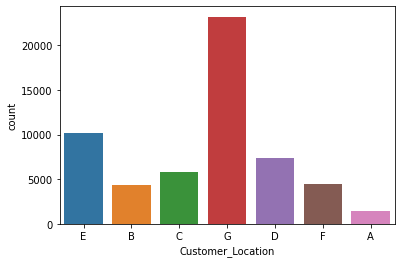

In [464]:
sns.countplot(df1['Customer_Location'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


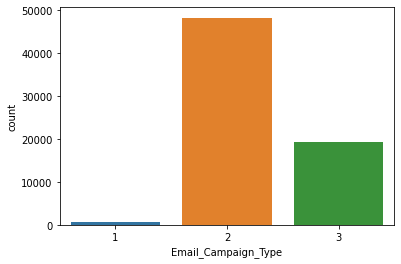

In [465]:
sns.countplot(df1['Email_Campaign_Type'])

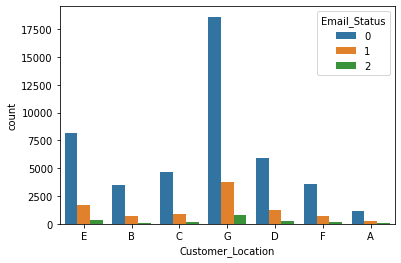

In [466]:
sns.countplot(x='Customer_Location',hue='Email_Status', data=df1)

In [467]:
print(df1.axes)
df1 =df1.drop(['Customer_Location','Email_ID'], axis = 1)
df1.shape

[RangeIndex(start=0, stop=68353, step=1), Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')]


(68353, 10)

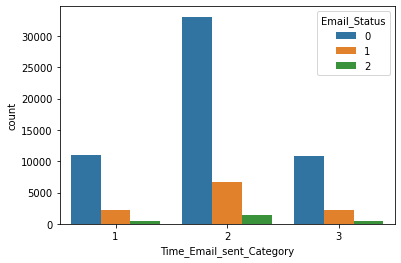

In [468]:
sns.countplot(x='Time_Email_sent_Category',hue='Email_Status', data=df1)

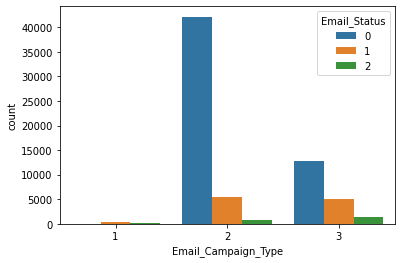

In [469]:
sns.countplot(x='Email_Campaign_Type',hue='Email_Status', data=df1)

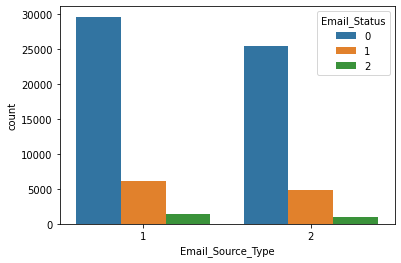

In [470]:
sns.countplot(x='Email_Source_Type',hue='Email_Status', data=df1)

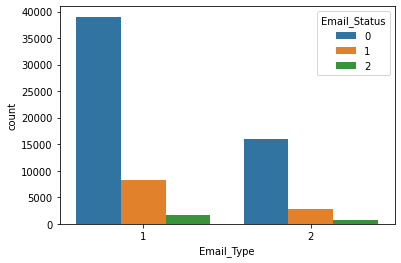

In [471]:
sns.countplot(x='Email_Type',hue='Email_Status', data=df1)

In [472]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_Type                 68353 non-null  int64  
 1   Subject_Hotness_Score      68353 non-null  float64
 2   Email_Source_Type          68353 non-null  int64  
 3   Email_Campaign_Type        68353 non-null  int64  
 4   Total_Past_Communications  61528 non-null  float64
 5   Time_Email_sent_Category   68353 non-null  int64  
 6   Word_Count                 68353 non-null  int64  
 7   Total_Links                66152 non-null  float64
 8   Total_Images               66676 non-null  float64
 9   Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 5.2 MB


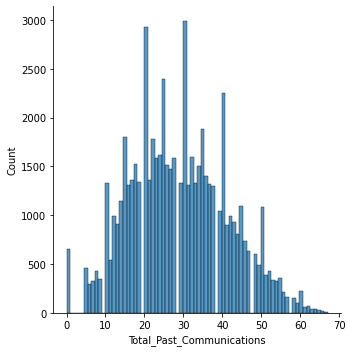

In [473]:
sns.displot(df1['Total_Past_Communications'])


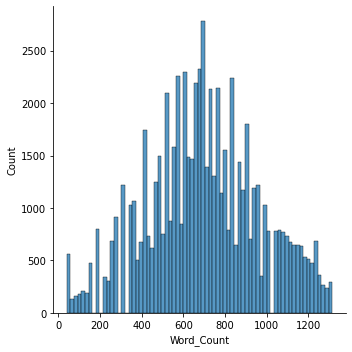

In [474]:
sns.displot(df1['Word_Count'])

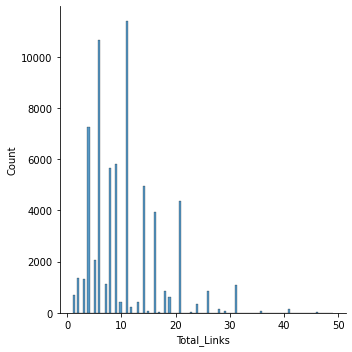

In [475]:
sns.displot(df1['Total_Links'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


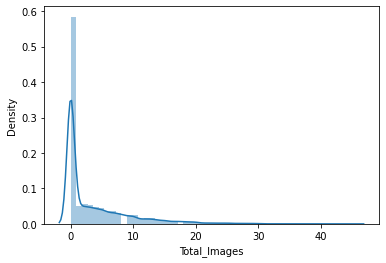

In [476]:
sns.distplot(df1['Total_Images'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


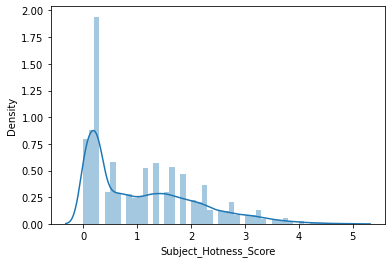

In [477]:
sns.distplot(df1['Subject_Hotness_Score'])

In [478]:
df1['Total_Links'] = df1['Total_Links'].fillna(df1['Total_Links'].mode()[0])

In [479]:
df1['Total_Past_Communications'] = df1['Total_Past_Communications'].fillna(df1['Total_Past_Communications'].mode()[0])

In [480]:
df1['Total_Images'] = df1['Total_Images'].fillna(df1['Total_Images'].mode()[0])

In [481]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_Type                 68353 non-null  int64  
 1   Subject_Hotness_Score      68353 non-null  float64
 2   Email_Source_Type          68353 non-null  int64  
 3   Email_Campaign_Type        68353 non-null  int64  
 4   Total_Past_Communications  68353 non-null  float64
 5   Time_Email_sent_Category   68353 non-null  int64  
 6   Word_Count                 68353 non-null  int64  
 7   Total_Links                68353 non-null  float64
 8   Total_Images               68353 non-null  float64
 9   Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 5.2 MB


In [505]:
df1.isnull().sum()

Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Email_Status                 0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


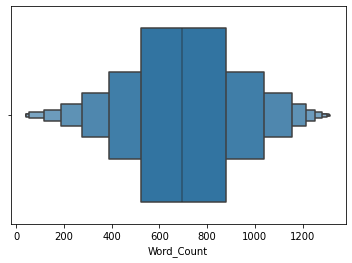

In [482]:
sns.boxenplot(df1['Word_Count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


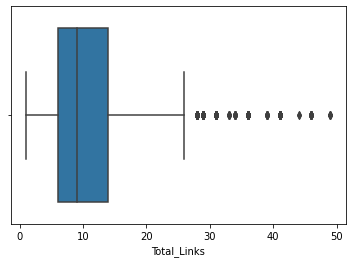

In [483]:
sns.boxplot(df1['Total_Links'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


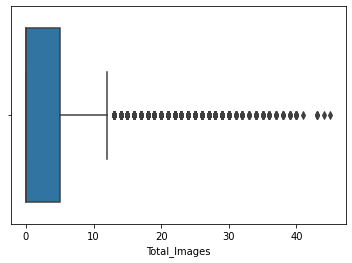

In [484]:
sns.boxplot(df1['Total_Images'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


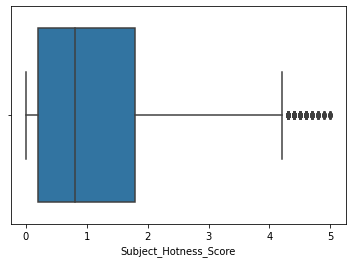

In [485]:
sns.boxplot(df['Subject_Hotness_Score'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


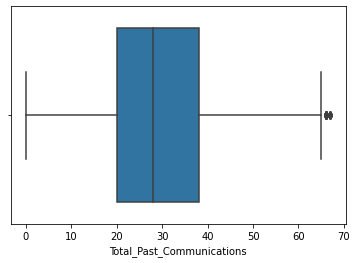

In [486]:
sns.boxplot(df['Total_Past_Communications'])

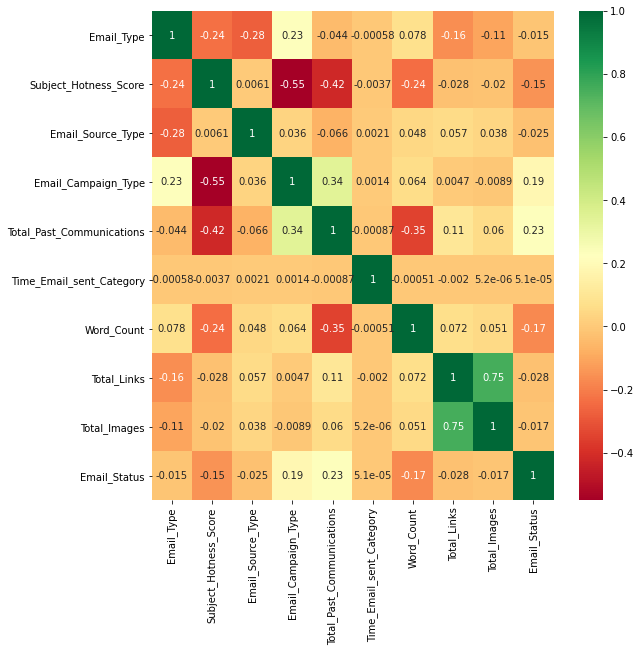

In [487]:
import seaborn as sc

X2 = df1.iloc[:,1:7]
Y2 = df1.iloc[:,-1]

corrmat  = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(9,9))

g= sc.heatmap(df1[top_corr_features].corr(),annot = True,cmap ="RdYlGn")

X_val = df1.iloc[:,1:7]
Y_val = df1.iloc[:,-1]
Y_val = Y_val.astype('int')

#X_train,X_test,Y_train,Y_test = train_test_split(X_val,Y_val,test_size=0.35,random_state = 32)

In [488]:
df1['links&images']=df1['Total_Links']+df1['Total_Images']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


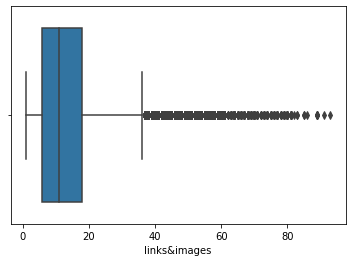

In [489]:
sns.boxplot(df1['links&images'])

In [490]:
df1 =df1.drop(['Total_Images'], axis = 1)

In [491]:
df1.shape

(68353, 10)

In [492]:
#df1 =df1.drop(['Total_Links','Total_Images'], axis = 1)
#df1.shape

In [493]:
df1 =df1.drop(['links&images'], axis = 1)

In [494]:
#df1['Status']=df1['Email_Status']

In [495]:
df1.columns

Index(['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links',
       'Email_Status'],
      dtype='object')

In [496]:
df1.shape

(68353, 9)

In [497]:
#df1 =df1.drop(['Email_Status'], axis = 1)
#df1.columns

In [498]:
y_col = df1.Email_Status
print(y_col.shape)
#df1.corr()
df1.nunique()

(68353,)


Email_Type                     2
Subject_Hotness_Score         51
Email_Source_Type              2
Email_Campaign_Type            3
Total_Past_Communications     64
Time_Email_sent_Category       3
Word_Count                   151
Total_Links                   37
Email_Status                   3
dtype: int64

In [499]:
print("Before OverSampling, counts of label '0': {}".format(sum(df1['Email_Status'] == 0)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(df1['Email_Status'] == 1)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(df1['Email_Status'] == 2)))

Before OverSampling, counts of label '0': 54941
Before OverSampling, counts of label '1': 11039 

Before OverSampling, counts of label '2': 2373 



In [500]:
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE

# fit predictor and target variable
sm = SMOTE(random_state = 2)
x_smote, y_smote = sm.fit_resample(df1.iloc[:,0:-1], df1['Email_Status'])

print('Original dataset shape', len(df1))
print('Resampled dataset shape', len(y_smote))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original dataset shape 68353
Resampled dataset shape 164823


In [501]:
#X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of x_smote: {}'.format(x_smote.shape))
print('After OverSampling, the shape of y_smote: {} \n'.format(y_smote.shape))
  
print("After OverSampling, counts of label '0': {}".format(sum(y_smote == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_smote == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_smote == 2)))

After OverSampling, the shape of x_smote: (164823, 8)
After OverSampling, the shape of y_smote: (164823,) 

After OverSampling, counts of label '0': 54941
After OverSampling, counts of label '1': 54941
After OverSampling, counts of label '2': 54941


In [502]:
from sklearn.model_selection import train_test_split


In [503]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3)

In [504]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score